In [1]:
#import
import pandas as pd
import numpy as np

In [2]:
#df = pd.read_csv("gnb_normalize_dataset_fix.csv")
df = pd.read_csv("dataset_iklim_new.csv", delimiter=";", thousands=".", decimal=",", parse_dates=["Tanggal"], index_col="Tanggal")

df

,Tn,Tx,Tavg,RH_avg,RR,ss,ff_x,ddd_x,ff_avg,ddd_car
Tanggal,,,,,,,,,,
2020-01-01,20.4,28.2,23.7,87.0,43.3,4.4,3.0,170.0,1.0,C
2020-01-02,21.2,28.8,23.8,90.0,2.6,3.9,4.0,150.0,1.0,C
2020-01-03,21.4,28.8,24.0,86.0,1.9,4.6,4.0,160.0,1.0,C
2020-01-04,21.6,28.6,24.2,86.0,2.1,3.0,4.0,290.0,1.0,C
2020-01-05,22.0,28.3,24.1,88.0,1.0,1.3,3.0,140.0,2.0,SE
...,...,...,...,...,...,...,...,...,...,...
2022-09-04,19.8,29.0,23.7,78.0,0.0,9.0,3.0,170.0,2.0,S
2022-09-05,19.4,29.3,23.8,78.0,16.4,5.7,5.0,90.0,2.0,C
2022-09-06,19.0,29.4,23.6,81.0,0.0,2.6,4.0,140.0,1.0,C


- 8888: data tidak terukur
- 9999: Tidak Ada Data (tidak dilakukan pengukuran)
- Tn: Temperatur minimum (°C)
- Tx: Temperatur maksimum (°C)
- **Tavg: Temperatur rata-rata (°C)**
- **RH_avg: Kelembapan rata-rata (%)**
- **RR: Curah hujan (mm)**
- **ss: Lamanya penyinaran matahari (jam)**
- ff_x: Kecepatan angin maksimum (m/s)
- ddd_x: Arah angin saat kecepatan maksimum (°)
- ff_avg: Kecepatan angin rata-rata (m/s)
- ddd_car: Arah angin terbanyak (°)

Next... checking datatypes

In [3]:
df = df.drop(['Tavg','ff_x','ddd_x','ff_avg','ddd_car'], axis = 1)
df

,Tn,Tx,RH_avg,RR,ss
Tanggal,,,,,
2020-01-01,20.4,28.2,87.0,43.3,4.4
2020-01-02,21.2,28.8,90.0,2.6,3.9
2020-01-03,21.4,28.8,86.0,1.9,4.6
2020-01-04,21.6,28.6,86.0,2.1,3.0
2020-01-05,22.0,28.3,88.0,1.0,1.3
...,...,...,...,...,...
2022-09-04,19.8,29.0,78.0,0.0,9.0
2022-09-05,19.4,29.3,78.0,16.4,5.7
2022-09-06,19.0,29.4,81.0,0.0,2.6


In [4]:
df = df.dropna()
df

,Tn,Tx,RH_avg,RR,ss
Tanggal,,,,,
2020-01-01,20.4,28.2,87.0,43.3,4.4
2020-01-02,21.2,28.8,90.0,2.6,3.9
2020-01-03,21.4,28.8,86.0,1.9,4.6
2020-01-04,21.6,28.6,86.0,2.1,3.0
2020-01-05,22.0,28.3,88.0,1.0,1.3
...,...,...,...,...,...
2022-09-04,19.8,29.0,78.0,0.0,9.0
2022-09-05,19.4,29.3,78.0,16.4,5.7
2022-09-06,19.0,29.4,81.0,0.0,2.6


then, drop the rows with value 8888 (data tidak terukur a.k.a not measured) and 9999 (Tidak Ada Data (tidak dilakukan pengukuran) a.k.a no data), because we don't need it. 

Based on observation above, the value with 8888 and 9999 is only in the columns with column called rr (curah hujan)

In [5]:
# delete row with 8888 value
df.drop(df[df['RR'] == 8888].index, inplace=True)
df.drop(df[df['RR'] == 9999].index, inplace=True)
df

C:\Users\akuradz\AppData\Local\Temp\ipykernel_17072\816279575.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(df[df['RR'] == 8888].index, inplace=True)
C:\Users\akuradz\AppData\Local\Temp\ipykernel_17072\816279575.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(df[df['RR'] == 9999].index, inplace=True)


,Tn,Tx,RH_avg,RR,ss
Tanggal,,,,,
2020-01-01,20.4,28.2,87.0,43.3,4.4
2020-01-02,21.2,28.8,90.0,2.6,3.9
2020-01-03,21.4,28.8,86.0,1.9,4.6
2020-01-04,21.6,28.6,86.0,2.1,3.0
2020-01-05,22.0,28.3,88.0,1.0,1.3
...,...,...,...,...,...
2022-09-04,19.8,29.0,78.0,0.0,9.0
2022-09-05,19.4,29.3,78.0,16.4,5.7
2022-09-06,19.0,29.4,81.0,0.0,2.6


In [6]:
# get mean of Tn and Tx, assign to new column called "TnTxAvg"
df["TAvg"] = (df["Tn"] + df["Tx"]) / 2
df.drop(['Tn','Tx'], axis = 1, inplace=True)
# df["curahHujanPerTahun"] = (df["RR"]) / 365
# df[df["RR"] > 50]


C:\Users\akuradz\AppData\Local\Temp\ipykernel_17072\388052998.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["TAvg"] = (df["Tn"] + df["Tx"]) / 2
C:\Users\akuradz\AppData\Local\Temp\ipykernel_17072\388052998.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(['Tn','Tx'], axis = 1, inplace=True)


In [7]:
df_mean = pd.DataFrame()
df_mean['tempratur'] = df.TAvg.resample('M').ffill()
df_mean['kelembapan_udara'] = df.RH_avg.resample('M').ffill()
df_mean['lama_penyinaran'] = df.ss.resample('M').ffill()
df_mean['curah_hujan'] = df.RR.resample('M').sum().ffill()

# what does the code above mean?

df_mean

# print(df_mean.shape)
# sort by tanggal as datetime in tanggal

,tempratur,kelembapan_udara,lama_penyinaran,curah_hujan
Tanggal,,,,
2020-01-31,25.30,80.0,2.0,327.3
2020-02-29,25.70,85.0,4.1,502.4
2020-03-31,25.70,79.0,7.1,238.8
2020-04-30,24.70,74.0,3.1,154.2
2020-05-31,25.15,86.0,7.4,135.7
2020-06-30,23.45,77.0,8.0,3.2
2020-07-31,21.40,74.0,10.3,17.4
2020-08-31,24.00,75.0,10.0,55.3
2020-09-30,25.20,74.0,7.0,5.4


array([<AxesSubplot:xlabel='Tanggal', ylabel='Nilai'>,
       <AxesSubplot:xlabel='Tanggal', ylabel='Nilai'>,
       <AxesSubplot:xlabel='Tanggal', ylabel='Nilai'>,
       <AxesSubplot:xlabel='Tanggal', ylabel='Nilai'>], dtype=object)

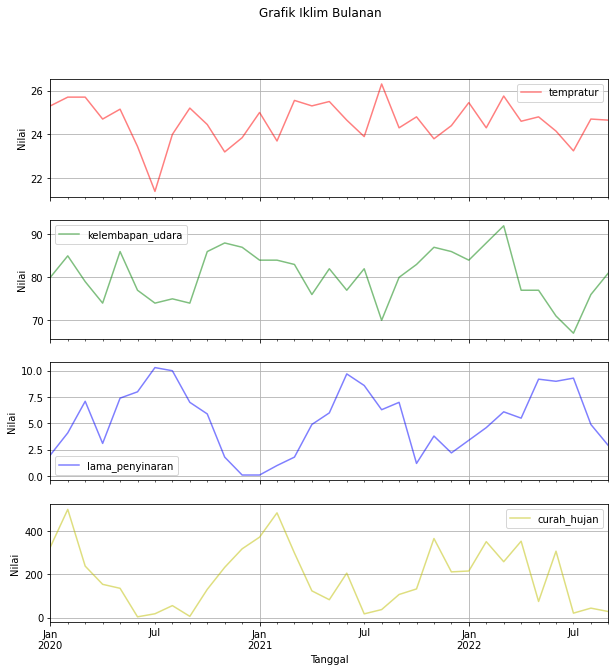

In [8]:
df_mean.plot(
    subplots=True,
    figsize=(10, 10),
    title="Grafik Iklim Bulanan",
    xlabel="Tanggal",
    ylabel="Nilai",
    grid=True,
    legend=True,
    style=["r", "g", "b", "y"],
    alpha=0.5,
)


In [9]:
# create new column with three categorical level value 0, 1, 2 based on rr value

labels = ['BURUK','BAIK']

good_temprature = [25, 30]
good_kelembapan = [75, 95]
good_lamapenyinaran = [7,9]
good_curahhujan = [83, 250]

# df['tn_level'] = pd.cut(df['tn'], bins=3, labels=labels)
# df['tx_level'] = pd.cut(df['tx'], bins=3, labels=labels)
# init empty dataframe
df_discreted = pd.DataFrame()
# if t_avg is range inside good_temprature, assign to new column tavg_level
df_discreted['tempratur'] = np.where((df_mean['tempratur'] >= good_temprature[0]) & (df_mean['tempratur'] <= good_temprature[1]), 'BAIK', 'BURUK')
df_discreted['kelembapan'] = np.where((df_mean['kelembapan_udara'] >= good_kelembapan[0]) & (df_mean['kelembapan_udara'] <= good_kelembapan[1]), 'BAIK', 'BURUK')
df_discreted['curah_hujan'] = np.where((df_mean['curah_hujan'] >= good_curahhujan[0]) & (df_mean['curah_hujan'] <= good_curahhujan[1]), 'BAIK', 'BURUK')
df_discreted['lama_penyinaran'] = np.where((df_mean['lama_penyinaran'] >= good_lamapenyinaran[0]) & (df_mean['lama_penyinaran'] <= good_lamapenyinaran[1]), 'BAIK', 'BURUK')

# df_mean['ss_level'] = pd.cut(df_mean['ss'], bins=3, labels=labels)
# df_mean['ff_x_level'] = pd.cut(df_mean['ff_x'], bins=3, labels=labels)
# df_mean['ddd_x_level'] = pd.cut(df_mean['ddd_x'], bins=3, labels=labels)
# df_mean['ff_avg_level'] = pd.cut(df_mean['ff_avg'], bins=3, labels=labels)

# df_mean.drop(['tavg','rh_avg','rr','ss'], axis = 1, inplace=True)

df_discreted


,tempratur,kelembapan,curah_hujan,lama_penyinaran
0,BAIK,BAIK,BURUK,BURUK
1,BAIK,BAIK,BURUK,BURUK
2,BAIK,BAIK,BAIK,BAIK
3,BURUK,BURUK,BAIK,BURUK
4,BAIK,BAIK,BAIK,BAIK
5,BURUK,BAIK,BURUK,BAIK
6,BURUK,BURUK,BURUK,BURUK
7,BURUK,BAIK,BURUK,BURUK
8,BAIK,BURUK,BURUK,BAIK
9,BURUK,BAIK,BAIK,BURUK


In [31]:

# iterate each row in dataframe
for index, row in df_discreted.iterrows():
    # count value with TINGGI value
    tinggi = 0

    # loop each column in dataframe
    for col in df_discreted.columns:
        # check if value is TINGGI
        if row.loc[col] == 'BAIK':
            tinggi += 1
  
    # calculate probability
    prob = tinggi / 4
    # set row column presentase with probability value
    
    df_discreted.loc[index, 'presentase'] = prob

    df_discreted.loc[index, 'peluang_pertumbuhan'] = 'BURUK' if prob < 0.5 else 'BAIK' 


# if discreted['peluang_pertumbuhan'] is 'BURUK', assign to new column 'peluang_pertumbuhan' with value 0 else 1
df_mean['peluang_pertumbuhan'] = np.where(df_discreted['peluang_pertumbuhan'] == 'BURUK', 0, 1)

In [40]:
x = df_mean[['tempratur','kelembapan_udara','lama_penyinaran','curah_hujan']]
print(x.dtypes)
y = df_mean['peluang_pertumbuhan']
print(x)

tempratur           float64
kelembapan_udara    float64
lama_penyinaran     float64
curah_hujan         float64
dtype: object
            tempratur  kelembapan_udara  lama_penyinaran  curah_hujan
Tanggal                                                              
2020-01-31      25.30              80.0              2.0        327.3
2020-02-29      25.70              85.0              4.1        502.4
2020-03-31      25.70              79.0              7.1        238.8
2020-04-30      24.70              74.0              3.1        154.2
2020-05-31      25.15              86.0              7.4        135.7
2020-06-30      23.45              77.0              8.0          3.2
2020-07-31      21.40              74.0             10.3         17.4
2020-08-31      24.00              75.0             10.0         55.3
2020-09-30      25.20              74.0              7.0          5.4
2020-10-31      24.45              86.0              5.9        130.8
2020-11-30      23.20             

In [41]:
# separate the dataset
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((26, 4), (7, 4), (26,), (7,))

In [42]:
from sklearn.preprocessing import MinMaxScaler
# print(x_train)
scaler = MinMaxScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [43]:
# import the model using multinomial naive bayes
# print(x_train)
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
# train the model
gnb.fit(x_train_scaled, y_train)
# predict the model
y_pred = gnb.predict(x_test_scaled)
# import the metrics
from sklearn import metrics

# print the accuracy
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.5714285714285714


In [44]:
y_pred

array([1, 1, 1, 0, 1, 1, 1])

In [54]:
# Example Data:
# Tempratur Udara = 26 derajat
# Kelembapan Udara = 80%
# Lama Penyinaran perhari = 7 jam
# Curah Hujan = 100 mm

new_data = np.array([[26,80,7,100]])

# transform new data using minmax scaler
new_data_scaled = scaler.transform(new_data)

# print('New data scaled:', new_data_scaled)

result_classes = ['BURUK', 'BAIK']
# predict the new data
y_new_pred = gnb.predict(new_data_scaled)
# show the prediction result

print('Tempratur Udara =', new_data[0][0], 'derajat')
print('Kelembapan Udara =', new_data[0][1], '%')
print('Lama Penyinaran perhari =', new_data[0][2], 'jam')
print('Curah Hujan =', new_data[0][3], 'mm/bulan')
print(result_classes[y_new_pred[0]])


New data scaled: [[0.93877551 0.61904762 0.67647059 0.19391026]]
BAIK


C:\Users\akuradz\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


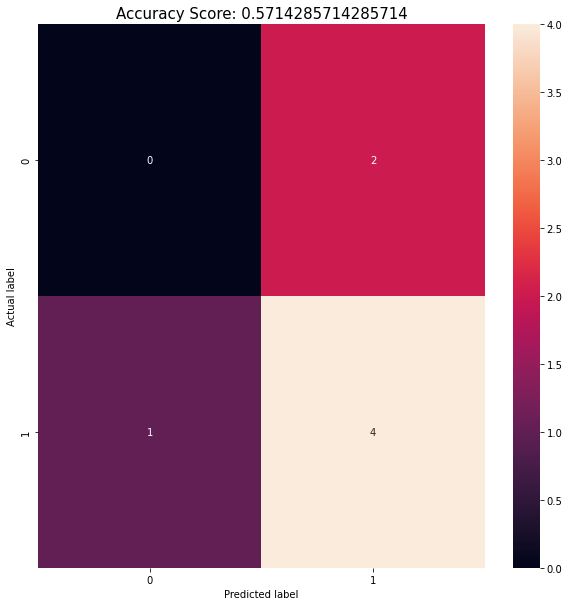

In [37]:
# plot naive bayes confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred, labels=gnb.classes_)
plt.figure(figsize=(10,10))
sns.heatmap(cm, annot=True)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(metrics.accuracy_score(y_test, y_pred))
plt.title(all_sample_title, size = 15)

plt.show()


In [26]:
# show the y_test based on separation dataset
# np.array(y_test)

# show the confusion matrix based on the prediction result 
#evaluate performance from the confusion matrix 
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

# show all probability for each predicted class 
gnb.predict_proba(x_test)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.67      0.80      0.73         5

    accuracy                           0.57         7
   macro avg       0.33      0.40      0.36         7
weighted avg       0.48      0.57      0.52         7



array([[0.07583416, 0.92416584],
       [0.38857234, 0.61142766],
       [0.06256548, 0.93743452],
       [0.7229312 , 0.2770688 ],
       [0.33739854, 0.66260146],
       [0.08475037, 0.91524963],
       [0.08349276, 0.91650724]])